# CNN  
Need two folders with the following structures for the training and test sets

```
-datasets-test_set -cats-cat.1.jpg
                        -cat.2.jpg
                        -cat.3.jpg
                         ....
                    -dogs -dog.1.jpg
                        -dog.2.jpg
                        ....
        -training_set -cats
                       -dogs
```

In [12]:
# Part 1 - Building the CNN
# In this example we have 10K in total, 
# 4K of dogs and 4K of cats in training set (total 8K) 
# And 1000 dogs and 1000 cats in the test set (2K) total

# Importing the Keras libraries and packages
# use initialse the neural network, sequence of layers or graph
from keras.models import Sequential
# package that convolutional layers with 2D images
from keras.layers import Conv2D
# max pooling of 2D images
from keras.layers import MaxPooling2D
# step 3 flattening the pooled feature maps into a large feature vector
from keras.layers import Flatten
# add the fully connected layers in a classic conected CNN
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()


In [13]:
# Step 1 - Convolution, call this classifyier as we are using cats and dogs
# add layers, convolution layer is first, this uses the Conv2D function, which
# takes as arguments: 32 is the number of filters (feature detectors), this
# will create 32 filter maps, each filter will be 3x3, 32 is a comon starting
# point with an increase to 64 and then 128 etc.
# input shape is shape of input image on which you will apply feature detecotrs
# as our images are all different shapes this forces them to all be hte same
# This forces them all into fixed size 
# color will be 3D array, black and white would be 2D array. As these are color
# images we have 3 channels (one if black and white), then 64 pixels * 64
# pixcels to reduce the processing time.
### WARNING #### 
# tensor flow back end 3D array dims, then the number of channels.
# if you are using another backend then it would be 3, 64,64)
# the activation function relu to avoid negative pixel values in feature map to
# avoid co-linearilty in our model

### NOTE THIS WILL FAIL BELOW IF YOU GET THIS WRONG - GOOD.
classifier.add(Conv2D(32, (3, 3), 
                      input_shape = (64, 64, 3), 
                      activation = 'relu'))
# other back end
#classifier.add(Conv2D(32, (3, 3), 
#                      input_shape = (3, 64, 64), 
#                      activation = 'relu'))


In [14]:
# Step 2 - Pooling
# reducing size of feature maps, take 2x2 table and take maximum of the four
# cells in the square, we stride with a stride of 2, this is a common setting
# this will harve the size of the feature maps
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [15]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
# this simple vector will be a layer
# we don't loose our spatial structure using the flattening, because the order
# of the filters repressent the spatial information in these images. As the we
# have extracted info using filters, then each node repressents a key feature
# in the images. If we did not do this then each node would be a simple pixel
# that has very little info.
classifier.add(Flatten())


In [16]:
# Step 4 - Full connection
# dense is a function to add a fully connected layer, the number of hidden nodes
# is
# 128, but this could be optimised
# We need the activation function to pass on their signal use relu in the
# hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [17]:
# this is the output layer, only 1 node because this is a binary outcome, if
# there were more than 2 classes we would have one per class, and we would use
# softmax activation
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
# stocastic gradient decent is 'adam'
# binary crossentrpy good for classification problems with binary outcome
# if had more than two categories, would choose categorical_crossentry
# Metrix is the performance metric, accuracy is the most common one.
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])


In [18]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
# this is an important step, it pre-processes the image to avoid too much over
# fitting, so the models are more flexible.
# see pre-processing options at ://keras.io/ 
# see https://keras.io/preprocessing/image/#imagedatagenerator-class
# we only have 8K images, so this data augmentation will create batches of
# images which have some transformations to them, like rotation, flipping, or
# even shearing them, to get a much more diverse set of images to train on.
# rescale is the feature transformation 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [19]:
# we need to rescale again for feature transformation
test_datagen = ImageDataGenerator(rescale = 1./255)
# this expects the directory structure that we have in this example
# the target size is 64x64 which is what we set above as well
# batch size random samples of images that will go through before weiths are
# updated
# class mode is binary or more than two cateogries
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


In [21]:
 # as before
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
# apply our model and also test it
# number of images is the number of, so each epoch takes one image at a time, we
 #want to
# go through all images, so we need 8000 images to move through each epoch
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)


Found 2000 images belonging to 2 classes.


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Epoch 1/25
8000/8000 [==============================] - 2168s 271ms/step - loss: 0.3869 - acc: 0.8163 - val_loss: 0.5449 - val_acc: 0.7954
Epoch 2/25
8000/8000 [==============================] - 2103s 263ms/step - loss: 0.1366 - acc: 0.9463 - val_loss: 0.8617 - val_acc: 0.7805
Epoch 3/25
8000/8000 [==============================] - 2030s 254ms/step - loss: 0.0675 - acc: 0.9754 - val_loss: 1.0382 - val_acc: 0.7978
Epoch 4/25
8000/8000 [==============================] - 2021s 253ms/step - loss: 0.0464 - acc: 0.9837 - val_loss: 1.2075 - val_acc: 0.7960
Epoch 5/25
8000/8000 [==============================] - 2022s 253ms/step - loss: 0.0364 - acc: 0.9875 - val_loss: 1.1794 - val_acc: 0.7885
Epoch 6/25
8000/8000 [==============================] - 2016s 252ms/step - loss: 0.0308 - acc: 0.9894 - val_loss: 1.3988 - val_acc: 0.7935
Epoch 7/25
8000/8000 [==============================] - 2016s 252ms/step - loss: 0.0261 - acc: 0.9912 - val_loss: 1.3497 - val_acc: 0.7935
Epoch 8/25
8000/8000 [=====

In [22]:
classifier.predict?

In [90]:
#example_set = test_datagen.flow_from_directory('dataset/example_set',
#                                            target_size = (64, 64),
#                                            batch_size = 32,
#                                            class_mode = 'binary')
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
# load the image
dog = load_img('dataset/example_set/test/dog.1.jpg')
dog_resize = dog.resize((64,64))
# convert to numpy array
data_dog = img_to_array(dog_resize)
samples_dog = expand_dims(data_dog, 0)
#datagen = ImageDataGenerator(rescale = 1./255)




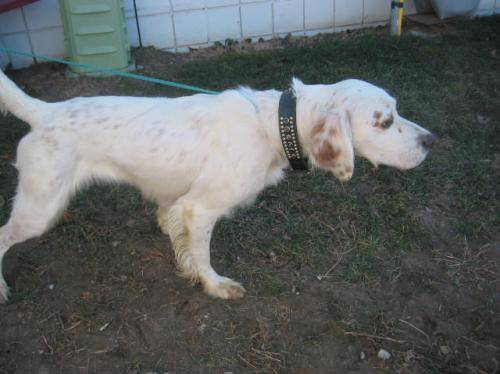

In [91]:
dog

In [88]:
# 0 == cat 1 == dog
classifier.predict(samples_dog)
#print(data.shape)
#print(samples.shape)
#need (64, 64, 3)

array([[1.]], dtype=float32)

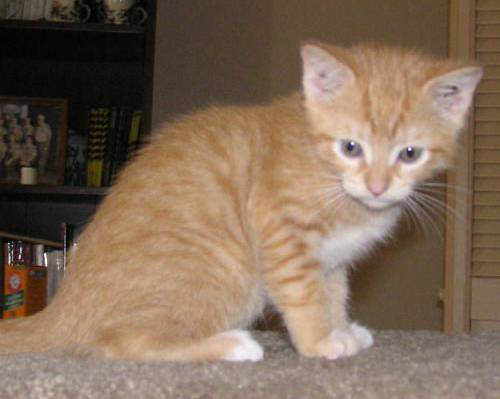

In [92]:
cat = load_img('dataset/example_set/test/cat.1.jpg')
cat_resize = cat.resize((64,64))
# convert to numpy array
data_cat = img_to_array(cat_resize)
samples_cat = expand_dims(data_cat, 0)
cat

In [93]:
classifier.predict(samples_cat)


array([[0.]], dtype=float32)

[[1.]]


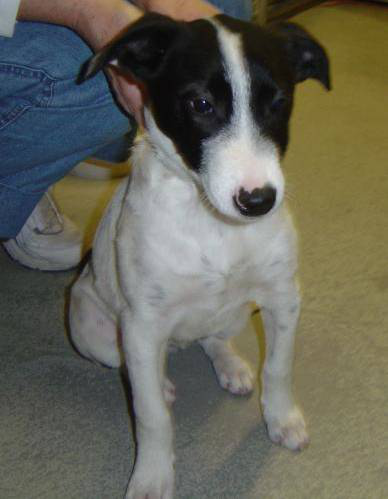

In [98]:
# second dog
dog = load_img('dataset/example_set/test/dog.2.jpg')
dog_resize = dog.resize((64,64))
# convert to numpy array
data_dog = img_to_array(dog_resize)
samples_dog = expand_dims(data_dog, 0)

print(classifier.predict(samples_dog))
dog

[[0.]]


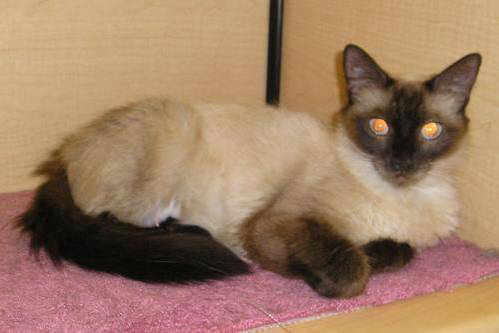

In [99]:
# second cat
cat = load_img('dataset/example_set/test/cat.2.jpg')
cat_resize = cat.resize((64,64))
# convert to numpy array
data_cat = img_to_array(cat_resize)
samples_cat = expand_dims(data_cat, 0)
print(classifier.predict(samples_cat))

cat

Final thing is that I rescaled the training data with `test_datagen = ImageDataGenerator(rescale = 1./255)` so I should do that with these single images as well (despite the fact it is already guessing correctly).

[[4.2516313e-17]]


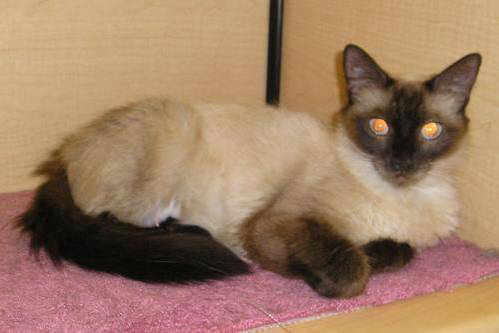

In [129]:
# second cat rescaled
cat = load_img('dataset/example_set/test/cat.2.jpg')
cat_resize = cat.resize((64,64))
# convert to numpy array
data_cat = img_to_array(cat_resize)
samples_cat = expand_dims(data_cat, 0)/255 # rescale
# this is another way of changing the dimensions
samples_cat_test = np.expand_dims(cat_resize, axis=0)/255
print(classifier.predict(samples_cat_test))

# returns a very small number ie nearly 0
cat

In [110]:
# returns false due to rounding so they are equiv
samples_cat == samples_cat_test

array([[[[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        ...,

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [Fa

[[1.]]
[[1.]]


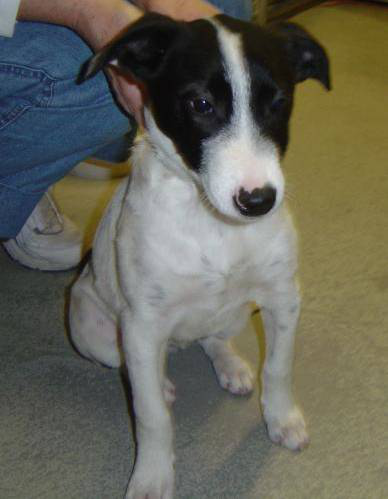

In [131]:
# second dog
dog = load_img('dataset/example_set/test/dog.2.jpg')
dog_resize = dog.resize((64,64))
# convert to numpy array
data_dog = img_to_array(dog_resize)
samples_dog = expand_dims(data_dog, 0)
# this is another way of oding this
samples_dog_test = np.expand_dims(dog_resize, axis=0)#/255

print(classifier.predict(samples_dog_test))
print(classifier.predict(samples_dog))

dog

Lets do a loop through dog images and find the ones it struggles with, then we will see if it does better with the resizings. I will loo through 100 images of dogs and see how well it works

In [133]:
def classify_image(fname, size=(64,64),resize=1):
    im = load_img(fname)
    im_resize = im.resize(size)
    # convert to numpy array
    data_im = img_to_array(im_resize)
    # resize by value this will change in testing
    samples_im = expand_dims(data_im, 0)/resize
    return classifier.predict(samples_im)
    

In [135]:
fname = 'dataset/example_set/test/dog.2.jpg'
classify_image(fname,resize=1)

array([[1.]], dtype=float32)

In [153]:
from os import listdir

correct, wrong = [],[]
fnames = listdir('dataset/example_set/dogs100/')
for fname in fnames:
    fname = 'dataset/example_set/dogs100/' + fname
    result = classify_image(fname)
    if result >0.9:
        correct.append(fname)
    else:
        wrong.append((fname,result))
print('the number of correct %s' % len(correct))
print('the number of wrong %s' % len(wrong))

the number of correct 3993
the number of wrong 7


In [154]:
wrong

[('dataset/example_set/dogs100/dog.3336.jpg', array([[0.]], dtype=float32)),
 ('dataset/example_set/dogs100/dog.529.jpg', array([[0.]], dtype=float32)),
 ('dataset/example_set/dogs100/dog.2829.jpg', array([[0.]], dtype=float32)),
 ('dataset/example_set/dogs100/dog.3401.jpg', array([[0.]], dtype=float32)),
 ('dataset/example_set/dogs100/dog.807.jpg', array([[0.]], dtype=float32)),
 ('dataset/example_set/dogs100/dog.1864.jpg', array([[0.]], dtype=float32)),
 ('dataset/example_set/dogs100/dog.1712.jpg', array([[0.]], dtype=float32))]

Now lets resize, interestingly when I use the logic result == 1 I actually get lots being wrong, however these are still very high probabilities ie ~99%, so if I set the cut-off to 0.9 then I actually do get a better performiung model when I properly resize the test images to 255 as was used in the training. So this is really interesting!

In [159]:
correct_resize, wrong_resize = [],[]
fnames = listdir('dataset/example_set/dogs100/')
for fname in fnames:
    fname = 'dataset/example_set/dogs100/' + fname
    result = classify_image(fname, resize=255)
    if result > 0.9:
        correct_resize.append(fname)
    else:
        wrong_resize.append((fname,result))
print('the number of correct %s' % len(correct_resize))
print('the number of wrong %s' % len(wrong_resize))

the number of correct 3999
the number of wrong 1


In [160]:
wrong_resize

[('dataset/example_set/dogs100/dog.1589.jpg',
  array([[0.16412333]], dtype=float32))]

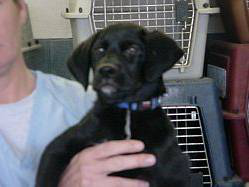

In [162]:
dog = load_img(wrong_resize[0][0])
dog

Try the same thing using the cats!

In [168]:
correct, wrong = [],[]
fnames = listdir('dataset/test_set/cats/')
for fname in fnames:
    fname = 'dataset/test_set/cats/' + fname
    result = classify_image(fname)
    if result <0.1:
        correct.append(fname)
    else:
        wrong.append((fname,result))
print('the number of correct %s' % len(correct))
print('the number of wrong %s' % len(wrong))


the number of correct 426
the number of wrong 574


Many of these that are wrong are predicting dog with probability 100%!

In [170]:
# now to resize
correct_resize, wrong_resize = [],[]
fnames = listdir('dataset/test_set/cats/')
for fname in fnames:
    fname = 'dataset/test_set/cats/' + fname
    result = classify_image(fname, resize=255)
    if result < 0.1:
        correct_resize.append(fname)
    else:
        wrong_resize.append((fname,result))
print('the number of correct %s' % len(correct_resize))
print('the number of wrong %s' % len(wrong_resize))

the number of correct 672
the number of wrong 328


In [171]:
wrong

[('dataset/test_set/cats/cat.4663.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4948.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4001.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4412.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4449.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4864.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4889.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4428.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4502.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4965.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4699.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4654.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4821.jpg', array([[1.]], dtype=float32)),
 ('dataset/test_set/cats/cat.4205.jpg', array([[1.]], dtype=float32)),
 ('dat

In [174]:
classifier.save('dog_cat_model')